Some basic examples with the package. This is a rough continuum subtracted image (I haven't removed the skylines) of DG Tau taken in 2005 with the [OASIS](http://www.ing.iac.es/Astronomy/instruments/oasis/index.html) instrument on the William Herschel Telescope (I don't remember the project ID right now but when I find it I will update this). The PV-slice was generated using [`pvextractor`](https://github.com/keflavich/pvextractor) which is a super useful tool! The data file itself is in the `data` folder.

In [3]:
%load_ext autoreload
%autoreload 2

from telassar import PVSlice
from telassar.plotter import get_background_rms
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
file = "../data/dgtau_OI6300_pvslice.fits"
pvdiag = PVSlice(file)

<IPython.core.display.Javascript object>


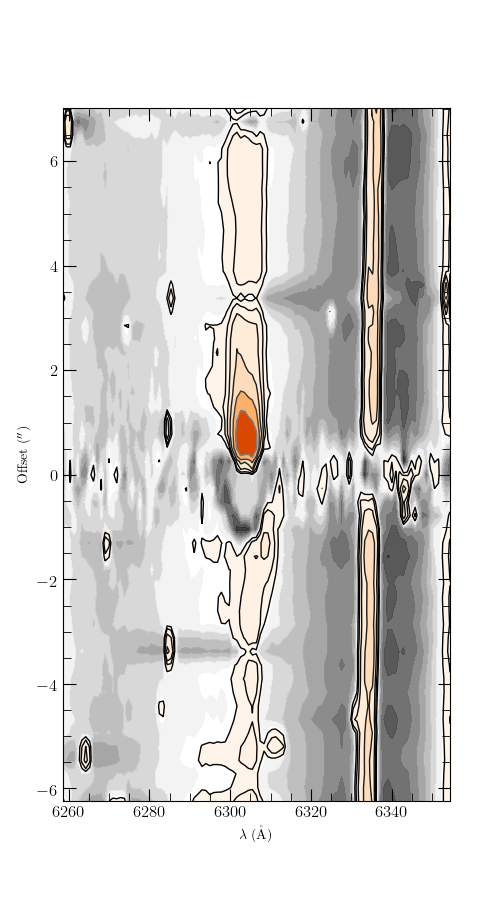

In [5]:
%matplotlib notebook

# make a simple plot
pvdiag.plot_contours(sigma=4)

Some customization can be done. We can trim the image to get a window around the [OI]$\lambda6300$ with `pvdiag.spectral_window()`, then call the `PVSlice.radial_velocity()` method to get a rough estimate of the velocity ranges and format the graph accordingly. By default, `spectral_window()` assumes pixel units, so if we don't want that we can specify the units.

Additionally, if a systemic velocity is known for an object, you can specify the `vcorr` parameter in the `radial_velocity()` function. 

In [6]:
sub_pv = pvdiag.spectral_window(vmin=6291, vmax=6315, unit='angstrom')

lbda1, lbda2 = sub_pv.velwave.get_range()
step = sub_pv.velwave.get_step()
wave = np.arange(lbda1, lbda2+1, step)

vrad = sub_pv.radial_velocity(ref='OI6300', lbdas=wave)

Now, let's inspect it. With the `plot_contours()` method we can specify several parameters:

In [7]:
help(sub_pv.plot_contours)

Help on method plot_contours in module telassar.pvslice:

plot_contours(figure=None, place=None, sigma=None, mask=None, levels1=None, levels2=None, cmaps=None, fig_kws=None, plt_kws=None, emline=None) method of telassar.pvslice.PVSlice instance
    Generate a contour plot of the data. Useful for jet visualization!
    
    Parameters
    -----------
    figure : None or `matplotlib.Figure` instance
        if you have a figure instance you want to send this to, specify it
    sigma : None or float
        the basis for generating levels. a 3sigma value indicates detection
        of a source, we abbreviate it here to just sigma
    place : int
        if you have multiple subplot axes, you can send the image to one
    mask : `np.ma.masked_array`
        if you want to specify a mask to send when computing the background
        levels, do it here
    levels1 : None or `np.ndarray` or list
        the contour levels for the jets
    levels2 : None or `np.ndarray` or list
        the co

So there's an attempt here at making a fairly easily customizable plot. Anything not specified by the user will be estimated by the plotter. The standard contour levels honestly aren't the best, and I haven't figured out a good way to handle them. But, we can define our own, so let's pass a few keywords and try them out.

<IPython.core.display.Javascript object>


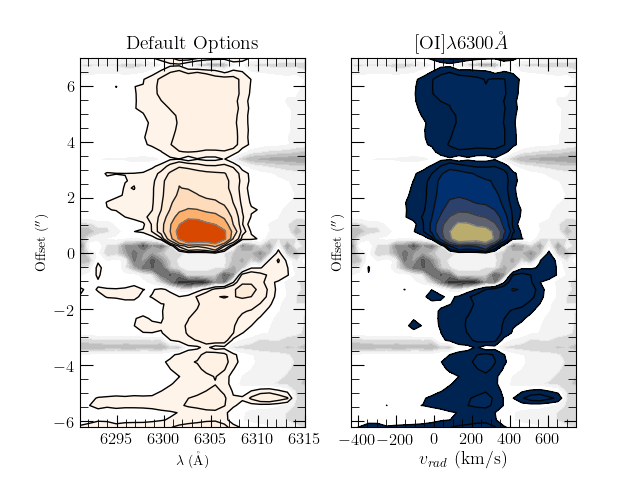

Text(0.5, 0, '$v_{rad}$ (km/s)')

In [12]:
%matplotlib notebook


# plt_kws = {'xlabel' : r"$v_rad$"}
fig, axes = plt.subplots(ncols=2, sharey=True)
sub_pv.plot_contours(figure=fig, place=0, emline="Default Options") #, cmaps=['gist_gray', 'jet', 'gray'])

# calculate a background rms at a desired sigma value
sigma5 = get_background_rms(sub_pv.data, sigma=5.)

# set increasing levels in sqrt(2) increments
levels = [3*sigma5 * np.sqrt(2)**i for i in range(0, 13, 2)]
# print(levels)

# we can also define our own extent, using our radial velocity array
y1, y2 = sub_pv.position.get_range()
x1, x2 = vrad[0], vrad[-1]
extent = {'extent' : [x1, x2, y1, y2]}
sub_pv.plot_contours(figure=fig, place=1, levels1=levels, 
                     cmaps=['gist_gray', 'cividis', 'gray'], 
                     plt_kws=extent,
                    emline="OI6300")

# just fix the x-axis label
axes[1].set_xlabel(r"$v_{rad}$ (km/s)", fontsize=13)
# axes[1].set_ylabel(False)

We can also take a cut across a spatial or spectral pixel (or pixels) to look at linear profiles, using either `spatial_profile()` or `spectral_profile()` class methods. If we plot this, it is interactive so we can click on a point to save it as a coordinate. This can be passed to the fitter and a profile can be plotted as well.

In [ ]:
%matplotlib notebook
spatial_cut = sub_pv.spatial_profile(
    arc=[-1., sub_pv.position.get_stop()], 
    wave=[6303, 6305], 
    spat_unit=True, 
    spec_unit=True
)

spatial_cut.plot()

In [ ]:
model=['g']
spatial_cut.test_fitter(model)